In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
from swmm_api import read_out_file
import os
from matplotlib.gridspec import GridSpec

from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Arial'],#['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

In [2]:
train_rewards = {}
train_rewards['PPO']=np.load('./step3-LFS/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewards['PPO-KGK1']=np.load('./step2-finetuneK1/Results_PPO_reward3/Results/Train200.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewards['PPO-KGK2']=np.load('./step2-finetuneK2/Results_PPO_reward3/Results/Train400.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewards['PPO-KGK3']=np.load('./step2-finetuneK3/Results_PPO_reward3/Results/Train100.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewards['PPO-KGK123']=np.load('./step2-finetuneK123/Results_PPO_reward3/Results/Train500.npy',allow_pickle=True).tolist()['Episode_reward']

train_rewards['PPO-preK1']=np.load('./step1-pretrainK1/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
train_rewards['PPO-preK2']=np.load('./step1-pretrainK2/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
train_rewards['PPO-preK3']=np.load('./step1-pretrainK3/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
train_rewards['PPO-preK123']=np.load('./step1-pretrainK123/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()

#train_rewards['DQN nosafe']=np.load('./step3-DRL fullnosafe/Results_DQN_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']
#train_rewards['PPO nosafe']=np.load('./step3-DRL fullnosafe/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']

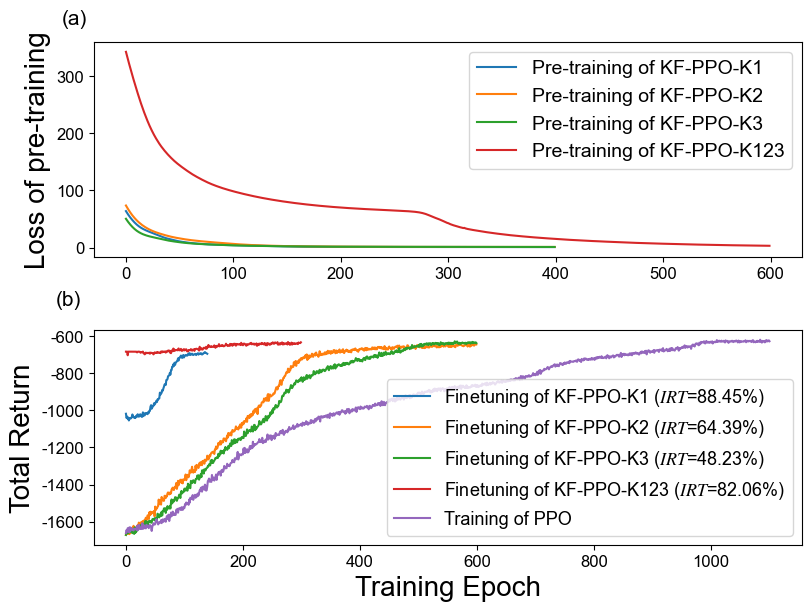

In [19]:
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(8,6)
                )
gs = GridSpec(2, 1, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

ax4 = fig.add_subplot(gs[0])
ax4.plot(train_rewards['PPO-preK1']['Loss'][:400],label='Pre-training of KF-PPO-K1')
ax4.plot(train_rewards['PPO-preK2']['Loss'][:400],label='Pre-training of KF-PPO-K2')
ax4.plot(train_rewards['PPO-preK3']['Loss'][:400],label='Pre-training of KF-PPO-K3')
ax4.plot(train_rewards['PPO-preK123']['Loss'][:600],label='Pre-training of KF-PPO-K123')
#ax4.plot(train_rewards['PPO-preK4']['Loss'][:300],label='Pre-training of KF-PPO-K4')
ax4.legend(fontsize=14)
ax4.set_ylabel('Loss of pre-training',fontsize=20)
plt.text(x=-60,y=390, s='(a)',fontsize=15)

ax2 = fig.add_subplot(gs[1])
ax2.plot(train_rewards['PPO-KGK1'][:140],label='Finetuning of KF-PPO-K1 ('+r'${IRT}$'+'=88.45%)')
ax2.plot(train_rewards['PPO-KGK2'][:600],label='Finetuning of KF-PPO-K2 ('+r'${IRT}$'+'=64.39%)')
ax2.plot(train_rewards['PPO-KGK3'][:600],label='Finetuning of KF-PPO-K3 ('+r'${IRT}$'+'=48.23%)')
ax2.plot(train_rewards['PPO-KGK123'][:300],label='Finetuning of KF-PPO-K123 ('+r'${IRT}$'+'=82.06%)')
#ax2.plot(train_rewards['PPO-KGK4'][:],label='Finetuning of KF-PPO-K4')
ax2.plot(train_rewards['PPO'][:],label='Training of PPO')
ax2.legend(fontsize=13)
ax2.set_ylabel('Total Return',fontsize=20)
ax2.set_xlabel('Training Epoch',fontsize=20)
#ax2.set_xlabel('Training Epoch',fontsize=20)
plt.text(x=-120,y=-430, s='(b)',fontsize=15)

plt.savefig('./PPO_train.png',dpi=200,bbox_inches='tight')

# Time
## finetune收敛步数：K1：120；K2：390；K3：580；K123：200
## 选择的pretrained model：K1：200，K2：400，K3：100，K123：500

In [12]:
# 每10步记录一次时间
times = {}
#times['DQN'] = np.load('./step3-DRL full/Results_DQN_reward3/time.npy',allow_pickle=True).tolist()
times['PPO'] = np.load('./step3-LFS/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
#times['Pre-DQN'] = np.load('./step1-DRL pretrain/Results_DQN_reward3/time.npy',allow_pickle=True).tolist()
times['Pre-PPO-K1'] = np.load('./step1-pretrainK1/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['Pre-PPO-K2'] = np.load('./step1-pretrainK2/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['Pre-PPO-K3'] = np.load('./step1-pretrainK3/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['Pre-PPO-K123'] = np.load('./step1-pretrainK123/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
#times['Pre-PPO-K4'] = np.load('./step1-pretrainK4/Results_PPO_reward3/time.npy',allow_pickle=True).tolist()
times['KG-PPO-K1'] = np.load('./step2-finetuneK1/Results_PPO_reward3/time200.npy',allow_pickle=True).tolist()
times['KG-PPO-K2'] = np.load('./step2-finetuneK2/Results_PPO_reward3/time400.npy',allow_pickle=True).tolist()
times['KG-PPO-K3'] = np.load('./step2-finetuneK3/Results_PPO_reward3/time100.npy',allow_pickle=True).tolist()
times['KG-PPO-K123'] = np.load('./step2-finetuneK123/Results_PPO_reward3/time500.npy',allow_pickle=True).tolist()
#times['KG-PPO-K4'] = np.load('./step2-finetuneK4/Results_PPO_reward3/time100.npy',allow_pickle=True).tolist()
#times['Pre-DQN-OPT'] = np.load('./step1-DRL pretrainOPT/Results_DQN_reward3/time.npy',allow_pickle=True).tolist()

In [27]:
LFS,K1,K2,K3,K123 = 110,12,39,58,int(200/10)
print(
    {
        'PPO':times['PPO'][LFS]}
        )
print(
    {
        'KF-PPO-K1':times['KG-PPO-K1'][K1],
        'KF-PPO-K2':times['KG-PPO-K2'][K2],
        'KF-PPO-K3':times['KG-PPO-K3'][K3],
        'KF-PPO-K123':times['KG-PPO-K123'][K123],}
)
print(
    {
        'Pre-PPO-K1':times['Pre-PPO-K1'][20],
        'Pre-PPO-K2':times['Pre-PPO-K2'][20],
        'Pre-PPO-K3':times['Pre-PPO-K3'][20],
        'Pre-PPO-K123':times['Pre-PPO-K123'][50]
    }
)
print(times['KG-PPO-K1'][K1]+times['Pre-PPO-K1'][20],
      times['KG-PPO-K2'][K2]+times['Pre-PPO-K2'][20],
      times['KG-PPO-K3'][K3]+times['Pre-PPO-K3'][20],
      times['KG-PPO-K123'][K123]+times['Pre-PPO-K123'][50])

{'PPO': 15209.171149599999}
{'KF-PPO-K1': 1757.238505, 'KF-PPO-K2': 5416.4150766, 'KF-PPO-K3': 7874.037748899999, 'KF-PPO-K123': 2728.9130749}
{'Pre-PPO-K1': 1888.4797652999998, 'Pre-PPO-K2': 1900.7199636, 'Pre-PPO-K3': 1839.9326913, 'Pre-PPO-K123': 13642.7990621}
3645.7182703 7317.135040200001 9713.970440199999 16371.712137


In [24]:
irf_k1 = (times['PPO'][LFS]-times['KG-PPO-K1'][K1])/times['PPO'][LFS]
irf_k2 = (times['PPO'][LFS]-times['KG-PPO-K2'][K2])/times['PPO'][LFS]
irf_k3 = (times['PPO'][LFS]-times['KG-PPO-K3'][K3])/times['PPO'][LFS]
irf_k123 = (times['PPO'][LFS]-times['KG-PPO-K123'][K123])/times['PPO'][LFS]
print(irf_k1,irf_k2,irf_k3,irf_k123)

0.8844619152670778 0.6438717781972982 0.48228357275688316 0.8205745041555556


# pretrain可塑性

In [17]:
pl = {}
#pl['DQN-preEFD']=np.load('./step1-DRL pretrainEFD-timetest/Results_DQN_reward3/Results/Train1.npy',allow_pickle=True).tolist()
pl['PPO-preK1']=np.load('./step1-pretrainK1/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
pl['PPO-preK2']=np.load('./step1-pretrainK2/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
pl['PPO-preK3']=np.load('./step1-pretrainK3/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
pl['PPO-preK123']=np.load('./step1-pretrainK123/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()

#train_grads = {}
#train_grads['PPO-preEFD']=np.load('./step1-pretrainEFD-0grad/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()
#train_grads['PPO-preOPT']=np.load('./step1-pretrainOPT-0grad/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()

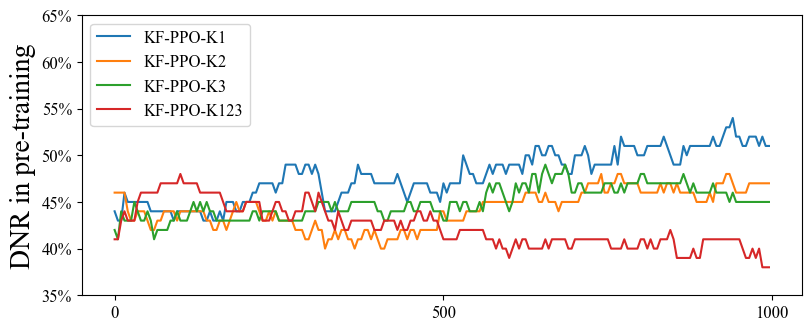

In [18]:
fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(8,6)
                )
gs = GridSpec(2, 1, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

ax = fig.add_subplot(gs[0])
ax.plot(np.array(pl['PPO-preK1']['Dormant Neuron number'])[:200],label='KF-PPO-K1')
ax.plot(np.array(pl['PPO-preK2']['Dormant Neuron number'])[:200],label='KF-PPO-K2')
ax.plot(np.array(pl['PPO-preK3']['Dormant Neuron number'])[:200],label='KF-PPO-K3')
ax.plot(np.array(pl['PPO-preK123']['Dormant Neuron number'])[:200],label='KF-PPO-K123')
x = np.array([0,100,200])
ax.set_xticks(x,5*x)
y = [0.35,0.4,0.45,0.5,0.55,0.6,0.65]
ax.set_yticks(y,['35%','40%','45%','50%','55%','60%','65%'])
ax.set_ylabel('DNR in pre-training',fontsize=20)
ax.legend()

#ax = fig.add_subplot(gs[1])
#ax.plot(np.array(np.abs(train_grads['PPO-preEFD']['average_grad']))[:200],label='KF-PPO-EFD')
#ax.plot(np.array(np.abs(train_grads['PPO-preOPT']['average_grad']))[:200],label='KF-PPO-OPT')
#x = np.array([0,100,200])
#ax.set_ylabel('Average gradient value'+'\n'+'during pre-training',fontsize=20)
#ax.set_xticks(x,5*x)
#ax.set_xlabel('Training Epoch',fontsize=20)
#ax.legend()

fig.savefig('DNR.png',dpi=200,bbox_inches='tight')

In [7]:
train_rewardstest = {}
train_rewardstest['PPO']=np.load('./step3-fullnosafe/Results_PPO_reward3/Results/Train.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD0']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train0.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD10']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train10.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD20']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train20.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD30']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train30.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD40']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train40.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD50']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train50.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD60']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train60.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD70']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train70.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD80']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train80.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD90']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train90.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD100']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train100.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD110']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train110.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD120']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train120.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD130']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train130.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD140']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train140.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGEFD150']=np.load('./step2-finetuneEFD-0/Results_PPO_reward3/Results/Train150.npy',allow_pickle=True).tolist()['Episode_reward']

train_rewardstest['PPO-KGOPT0']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train0.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT10']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train10.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT20']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train20.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT30']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train30.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT40']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train40.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT50']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train50.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT60']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train60.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT70']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train70.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT80']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train80.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT90']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train90.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT100']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train100.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT110']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train110.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT120']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train120.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT130']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train130.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT140']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train140.npy',allow_pickle=True).tolist()['Episode_reward']
train_rewardstest['PPO-KGOPT150']=np.load('./step2-finetuneOPT-0/Results_PPO_reward3/Results/Train150.npy',allow_pickle=True).tolist()['Episode_reward']

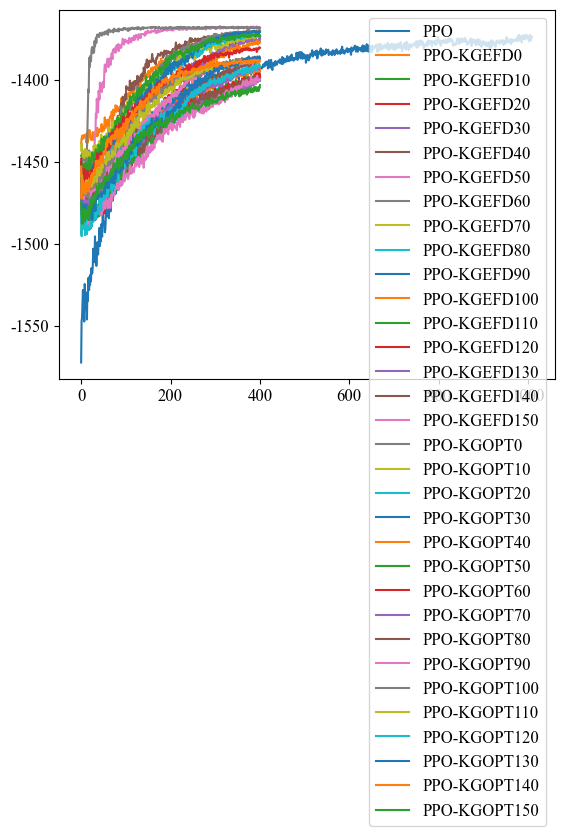

In [8]:
for k in train_rewardstest.keys():
    plt.plot(train_rewardstest[k],label=k)
plt.legend()

In [ ]:
# 收敛速度、pretrain loss、plasticity
def get_com(typeid,step):
    # finetune convergence speed
    speedk = 0
    item, tem = 0, train_rewardstest['PPO-KG'+typeid+step][0]
    for i in range(1,len(train_rewardstest['PPO-KG'+typeid+step])):
        if np.abs(tem-train_rewardstest['PPO-KG'+typeid+step][i])<0.5:
            speedk += 1
            if speedk >= 10:
                item = i
                break
        tem = train_rewardstest['PPO-KG'+typeid+step][i]
    # pretrain loss
    ploss = train_rewards['DQN-pre'+typeid]['Loss'][int(item*5)].numpy()
    # plasticity
    plas = pl['PPO-pre'+typeid]['Dormant Neuron number'][int(item)]
    return 5*item,ploss,plas

In [68]:
items,plos,plas = [], [], []
for step in range(0,150,10):
    item,plo,pla = get_com('EFD',str(step))
    items.append(item)
    plos.append(plo)
    plas.append(pla)

In [69]:
items

[380, 370, 240, 300, 520, 515, 275, 335, 575, 400, 310, 220, 325, 540, 320]

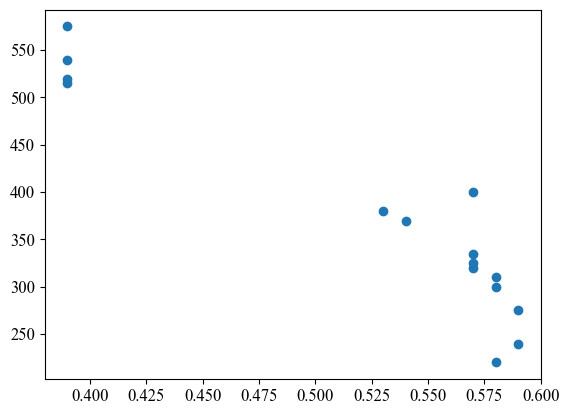

In [70]:
ax = plt.figure().add_subplot(111)#,projection = '3d')
ax.scatter(plas,items)

In [58]:
items,plos,plas = [], [], []
for step in range(0,150,10):
    item,plo,pla = get_com('OPT',str(step))
    items.append(item)
    plos.append(plo)
    plas.append(pla)

In [59]:
items

[1770, 0, 0, 0, 0, 1930, 0, 0, 0, 1730, 640, 1880, 0, 0, 0]

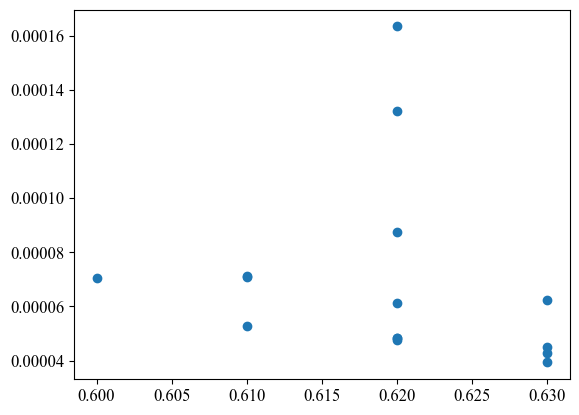

In [52]:
ax = plt.figure().add_subplot(111)#,projection = '3d')
ax.scatter(plas,plos)